In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. SORU

In [4]:
df.groupby("gender").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [5]:
from scipy.stats.stats import ttest_ind

ttest_ind(df[df.gender == "female"][["math score", "reading score", "writing score"]],
          df[df.gender == "male"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

In [6]:
df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [7]:
etnikler = df["race/ethnicity"].unique()
karşılaştırma = df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("\n'{}' için karşılaştırma \n".format(var))
    for i in range(0, len(etnikler)):
        for j in range(i+1, len(etnikler)):
            print(
                "{0} ve {1} arasında t-testi:".format(etnikler[i], etnikler[j]))
            print(ttest_ind(
                df[df["race/ethnicity"]
                           == etnikler[i]][var],
                df[df["race/ethnicity"] == etnikler[j]][var]
            ))


'math score' için karşılaştırma 

group B ve group C arasında t-testi:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
group B ve group A arasında t-testi:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
group B ve group D arasında t-testi:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.0048861971371041936)
group B ve group E arasında t-testi:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.00794604749797e-09)
group C ve group A arasında t-testi:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588041)
group C ve group D arasında t-testi:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
group C ve group E arasında t-testi:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
group A ve group D arasında t-testi:
Ttest_indResult(statistic=-3.3466982429712298, pvalue=0.0009068636053543751)
group A ve group E arasında t-testi:
Ttest_indResult(statistic=-5.93614

In [8]:
df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [9]:
ebeveyn_eğitim= df["parental level of education"].unique()
karşılaştırma = df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("\n'{}' için karşılaştırma \n".format(var))
    for i in range(0, len(ebeveyn_eğitim)):
        for j in range(i+1, len(ebeveyn_eğitim)):
            print(
                "{0} ve {1} arasında t-testi:".format(ebeveyn_eğitim[i], ebeveyn_eğitim[j]))
            print(ttest_ind(
                df[df["parental level of education"]
                           == ebeveyn_eğitim[i]][var],
                df[df["parental level of education"] == ebeveyn_eğitim[j]][var]
            ))


'math score' için karşılaştırma 

bachelor's degree ve some college arasında t-testi:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
bachelor's degree ve master's degree arasında t-testi:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
bachelor's degree ve associate's degree arasında t-testi:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
bachelor's degree ve high school arasında t-testi:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843372e-05)
bachelor's degree ve some high school arasında t-testi:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
some college ve master's degree arasında t-testi:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
some college ve associate's degree arasında t-testi:
Ttest_indResult(statistic=-0.5426842696247527, pvalue=0.5876182809234072)
some college ve high school arasında t-testi:
Ttest_indResult(stati

2. SORU

In [10]:
df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [11]:
ttest_ind(df[df.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
          df[df.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

3. SORU

In [12]:
df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [13]:
ttest_ind(df[df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
          df[df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

4. SORU

In [14]:
df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


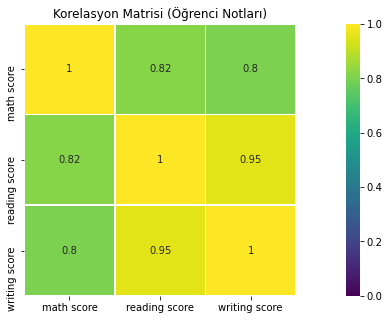

In [15]:
plt.figure(figsize=(18,5))

korelasyon_dersler = df[["math score", "reading score", "writing score"]].corr()
sns.heatmap(korelasyon_dersler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)")

plt.show()